# Desafio de Projeto DIO
**Pipeline de ETL com Python**

**Proposta**

O objetivo deste projeto é desenvolver uma aplicação simples do processo de ETL.

Na etapa de **extração**, será carregado e lido um arquivo no formato *csv*, que contém dados com relação às vendas de uma empresa fictícia de comércio de vestuário. Após a extração, o conjunto de dados será transformado para a estrutura de dados de *dataframe do pandas*.

Na **transformação**, serão criadas novas colunas para armazenar o cálculo do total da venda, total do custo e total do lucro. Tais cálculos serão realizados por meio de funções da biblioteca *pandas*.

Na etapa de **carga**, será feito o download do arquivo final no formato csv, contendo os dados originais mais as novas colunas calculadas. Além disso, serão plotados gráficos para facilitar a **visualização e análise dos dados**, utilizando-se recursos da biblioteca *matplotlib*.



---



## Importações necessárias



*   Pandas: leitura dos dados, transformação em dataframe, manipulação dos dados
*   Matplotlib: plotagem dos gráficos
*   PdfPages: salvar os gráficos gerados em um relatório



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## **E**xtract (Extração dos dados)

Antes de executar, carregar o arquivo 'vendas_trim1.csv' para o ficheiro do Colab.

In [2]:
df_original = pd.read_csv('vendas_trim1.csv')

In [3]:
# Visualizando os primeiros registros do dataframe:
df_original.head()

,ID_venda,ID_vendedor,Data,Produto,Quantidade,Preco_venda,Custo
0,1,1,2022-01-10,Camiseta lisa,120,10,6.5
1,2,1,2022-01-11,Camiseta estampada,50,25,15.0
2,3,2,2022-01-13,Camiseta lisa,100,10,6.5
3,4,3,2022-01-15,Calça sarja,30,50,22.0
4,5,1,2022-01-15,Bermuda algodão,20,40,25.0


## **T**ransform (Transformação dos dados)



*   Calculando o total da venda e armazenando na nova coluna Total_venda
*   Calculando o total dos custos e armazenando na nova coluna Total_Custo
*   Calculando o total do lucro e armazenando na nova coluna Total_lucro



In [4]:
# Criando uma cópia dos dados originais para as manipulações:
df = df_original.copy()

In [5]:
# Calculando Total_venda
df['Total_venda'] = df['Quantidade'] * df['Preco_venda']

# Calculando Total_custo
df['Total_custo'] = df['Quantidade'] * df['Custo']

# Calculando Total_lucro
df['Total_lucro'] = (df['Preco_venda'] - df['Custo']) * df['Quantidade']

In [6]:
# Verificando a inclusão dos registros:
df.head()

,ID_venda,ID_vendedor,Data,Produto,Quantidade,Preco_venda,Custo,Total_venda,Total_custo,Total_lucro
0,1,1,2022-01-10,Camiseta lisa,120,10,6.5,1200,780.0,420.0
1,2,1,2022-01-11,Camiseta estampada,50,25,15.0,1250,750.0,500.0
2,3,2,2022-01-13,Camiseta lisa,100,10,6.5,1000,650.0,350.0
3,4,3,2022-01-15,Calça sarja,30,50,22.0,1500,660.0,840.0
4,5,1,2022-01-15,Bermuda algodão,20,40,25.0,800,500.0,300.0


## **L**oad (Carga dos dados)

*  Salvando o arquivo com os dados transformados no formato csv.
*  Criando visualizações para suporte à análise dos dados
*  Salvando os gráficos em um relatório no formato pdf.


In [7]:
# Salvanado o dataframe transformado em um novo arquivo csv:
df.to_csv('vendas_transformadas.csv', index=False)

### Visualização e Análise dos dados

#### **Produto mais vendido**

In [8]:
# Verificando qual foi o produto mais vendido no trimestre:
produto_mais_vendido = df['Produto'].value_counts().idxmax()
print(f"O produto mais vendido é: {produto_mais_vendido}")

O produto mais vendido é: Camiseta lisa


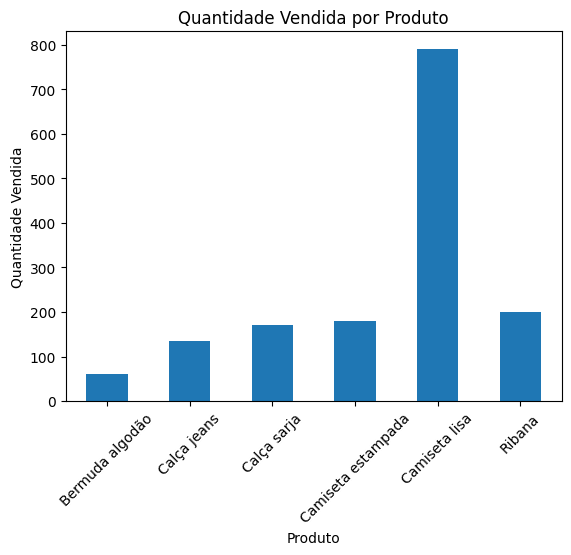

In [18]:
# Gráfico que mostra a quantidade vendida por produto:

# Agrupando os dados por produto e calculano a quantidade total vendida de cada produto:
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum()

# Plotando o gráfico:
quantidade_por_produto.plot(kind='bar', xlabel='Produto', ylabel='Quantidade Vendida', title='Quantidade Vendida por Produto')
plt.xticks(rotation=45)
plt.show()


#### **Quantidade vendida por vendedor**

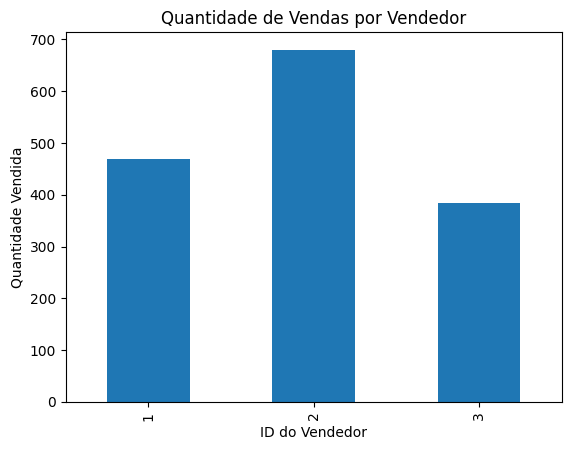

In [10]:
# Visualizando a quantidade de vendas por vendedor:

# Agrupando os dados por vendedor e calculando a quantidade total de vendas de cada vendedor:
quantidade_por_vendedor = df.groupby('ID_vendedor')['Quantidade'].sum()

# Plotando o gráfico:
quantidade_por_vendedor.plot(kind='bar', xlabel='ID do Vendedor', ylabel='Quantidade Vendida', title='Quantidade de Vendas por Vendedor')
plt.show()

#### **Lucro obtido no período**

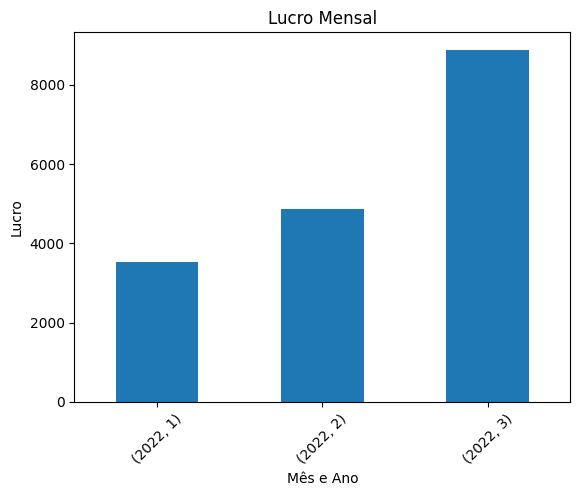

In [11]:
# Convertendo a coluna 'Data' para o tipo datetime:
df['Data'] = pd.to_datetime(df['Data'])

# Extraindo o mês e o ano da coluna 'Data':
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

# Agregando os dados por mês e ano para calcular o lucro:
lucro_mensal = df.groupby(['Ano', 'Mês'])['Total_lucro'].sum()

# Plotando o gráfico:
lucro_mensal.plot(kind='bar', xlabel='Mês e Ano', ylabel='Lucro', title='Lucro Mensal')
plt.xticks(rotation=45)
plt.show()


#### **Salvando os gráficos em um relatório**

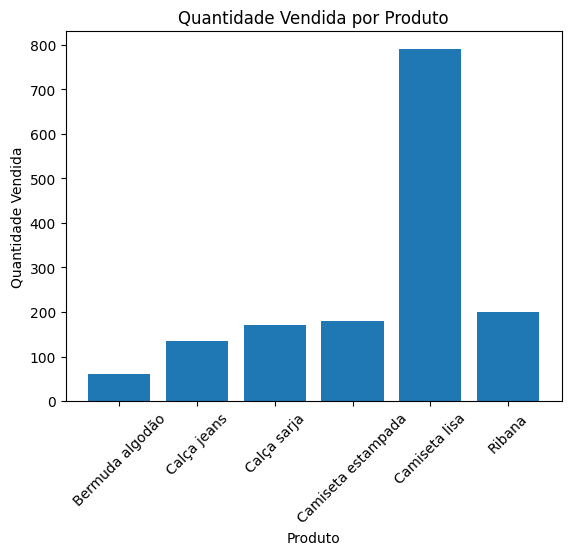

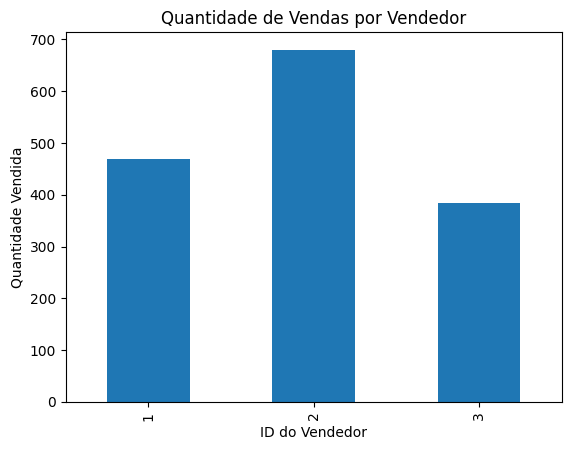

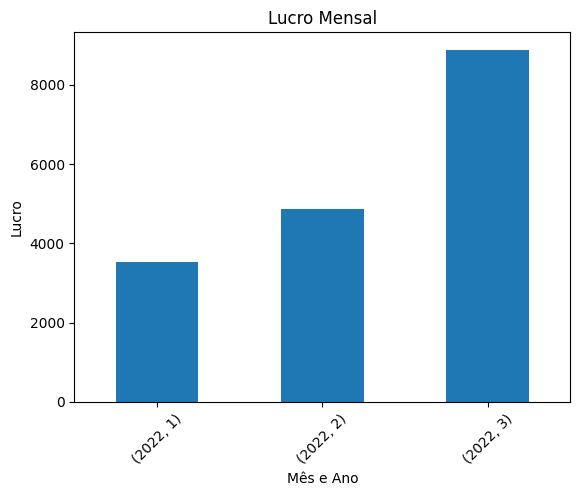

In [22]:
# Gráfico 1: Quantidade vendida por produto:
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum()
plt.figure()
plt.bar(quantidade_por_produto.index, quantidade_por_produto)
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.title('Quantidade Vendida por Produto')

# Gráfico 2: Quantidade vendida por vendedor:
quantidade_por_vendedor = df.groupby('ID_vendedor')['Quantidade'].sum()
plt.figure()
quantidade_por_vendedor.plot(kind='bar', xlabel='ID do Vendedor', ylabel='Quantidade Vendida', title='Quantidade de Vendas por Vendedor')

# Gráfico 3: Lucro mensal:
lucro_mensal = df.groupby(['Ano', 'Mês'])['Total_lucro'].sum()
plt.figure()
lucro_mensal.plot(kind='bar', xlabel='Mês e Ano', ylabel='Lucro', title='Lucro Mensal')
plt.xticks(rotation=45)


# Salvar os gráficos em um arquivo PDF
with PdfPages('relatorio.pdf') as pdf_pages:
    for fig in plt.get_fignums():  # Iterar sobre todas as figuras criadas
        pdf_pages.savefig(plt.figure(fig))